In [1]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

In [25]:
stakes=[0,]*101
stakes[100]=1 #winner winner chicken dinner
p_h= [0.25,.4,.6,.5]
pi=[0,]*100
print(stakes,pi)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


100%|██████████| 99/99 [00:00<?, ?it/s]


0.25 -> p_h for this run


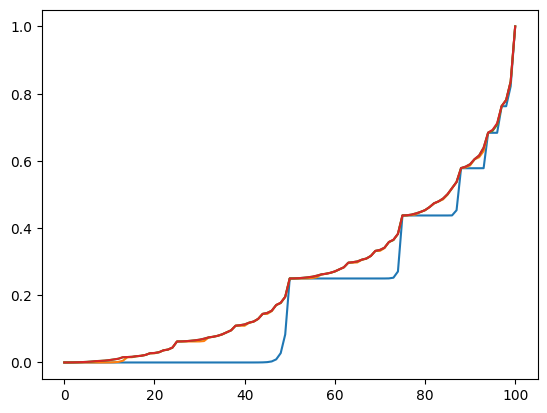

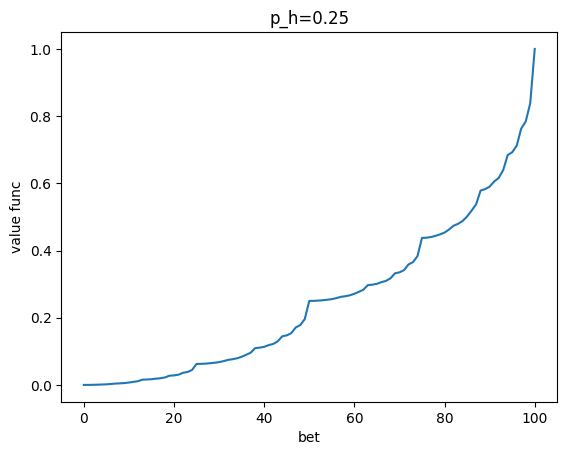

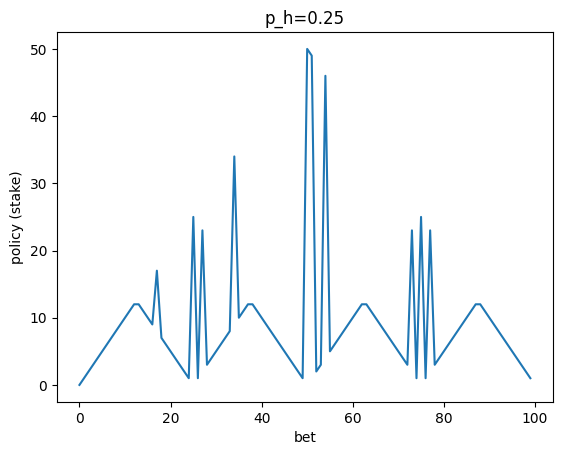

100%|██████████| 99/99 [00:00<?, ?it/s]


0.4 -> p_h for this run


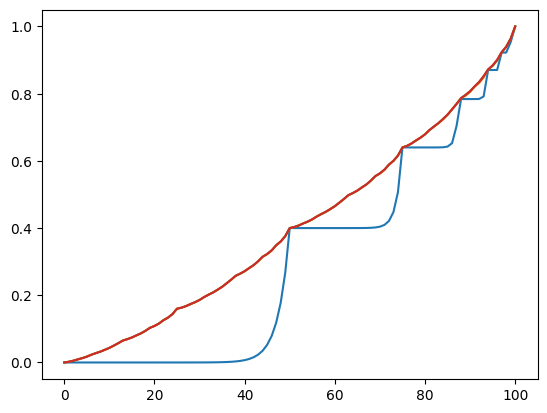

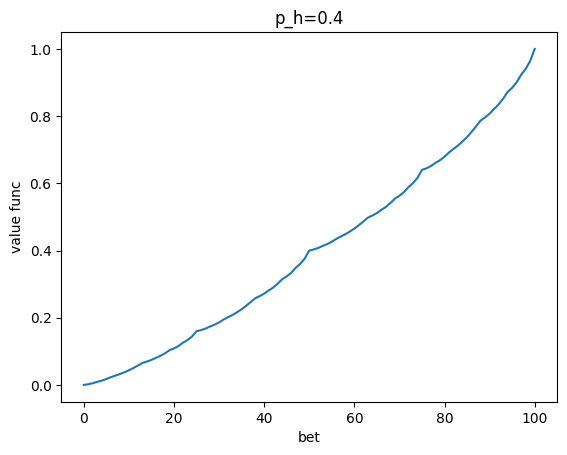

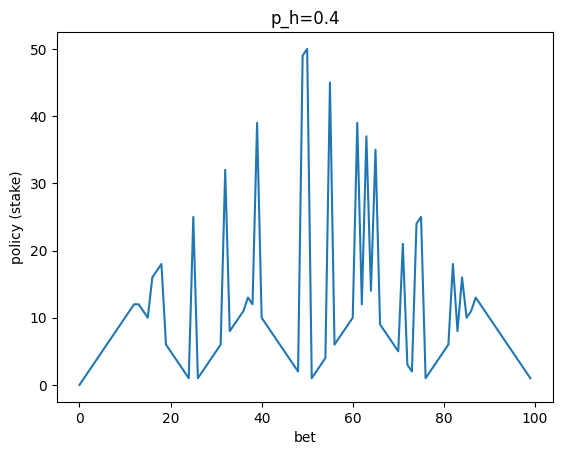

100%|██████████| 99/99 [00:00<?, ?it/s]


0.6 -> p_h for this run


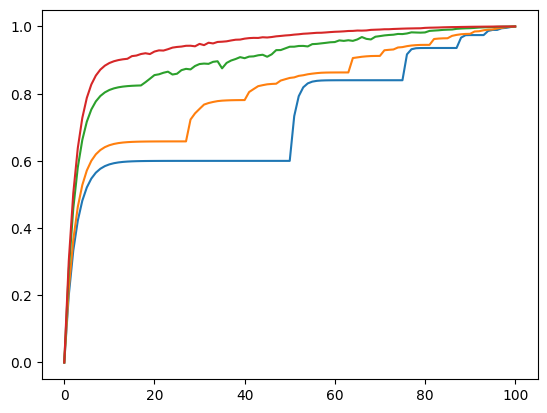

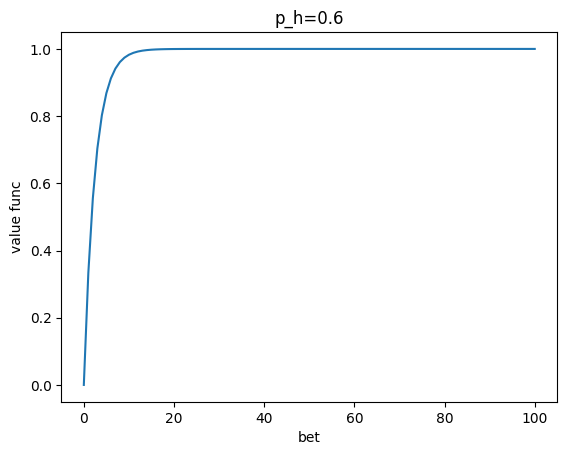

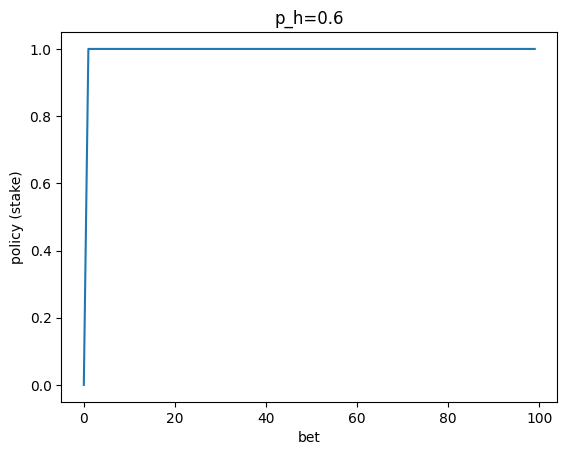

100%|██████████| 99/99 [00:00<00:00, 98959.98it/s]


0.5 -> p_h for this run


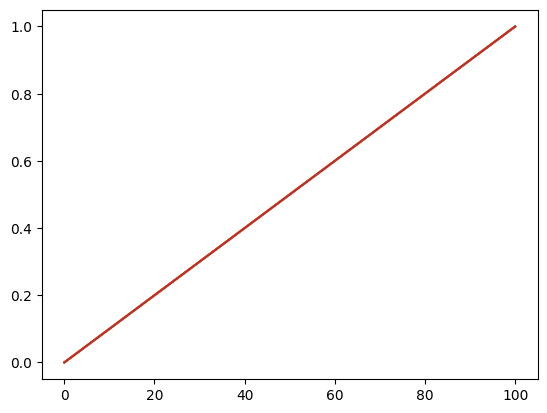

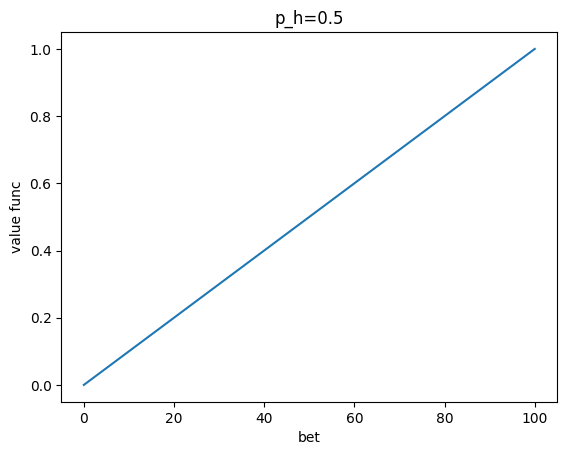

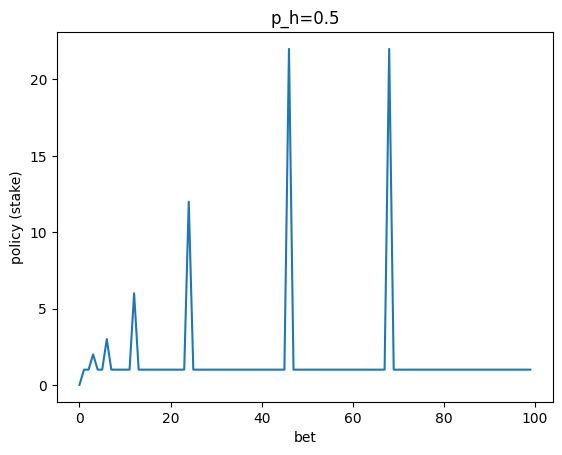

In [26]:
k=0
for z in p_h:
    while True:
        
        steady = True
        
        for cap in tqdm(range(1, 100)):
            action = pi[cap]
            q_a = dict()
            
            for stake in range(1, min(cap, 100-cap)+1):
                q_a[stake] = 0
                if cap+stake >= 100:
                    q_a[stake] += z
                else:
                    q_a[stake] += z*stakes[cap+stake]
                if cap-stake > 0:
                    q_a[stake] += (1-z)*stakes[cap-stake]
            pi[cap] = sorted(q_a.items(), key = lambda x : x[1], reverse=True)[0][0]
            if action != pi[cap]:
                steady = False
        
        if not steady:
            while True:
                delta = 0
                for cap in tqdm(range(1, 100)):
                    v = stakes[cap]
                    stakes[cap] = 0
                    stake = pi[cap]
                    if cap+stake >= 100:
                        stakes[cap] += z
                    else:
                        stakes[cap] += z*stakes[cap+stake]
                    if cap-stake > 0:
                        stakes[cap] += (1-z)*stakes[cap-stake]
                    delta = max(delta, abs(v-stakes[cap]))
                if delta < 1e-6:
                    break
            if k < 4:
                plt.plot(stakes)
                k+=1
        else:
            break
    k=0
    print(z, "-> p_h for this run")

    title='p_h='+str(z)

    plt.figure()
    plt.plot(stakes)
    plt.title(title)
    plt.xlabel('bet')
    plt.ylabel('value func')
    plt.show()

    plt.figure()
    plt.plot(np.arange(100),pi)
    plt.title(title)
    plt.xlabel('bet')
    plt.ylabel('policy (stake)')
    plt.show()
    
    pi=[0,]*100
    stakes=[0,]*101
    stakes[100]=1 #winner winner chicken dinner


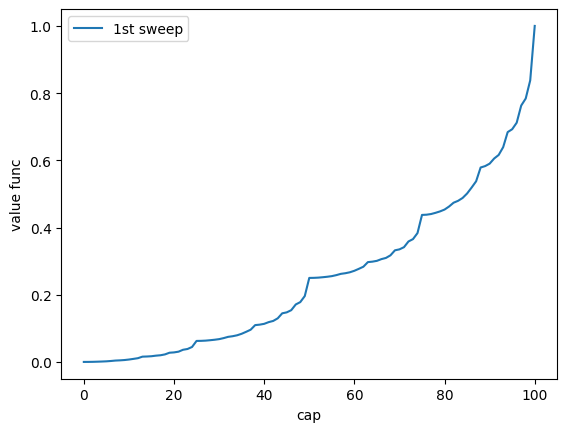

In [18]:
#0.25
plt.figure()
plt.plot(stakes)
plt.xlabel('bet')
plt.ylabel('value func')
plt.legend(['1st sweep', '2nd', '3rd', '4th', 'Final value function'])
plt.show()

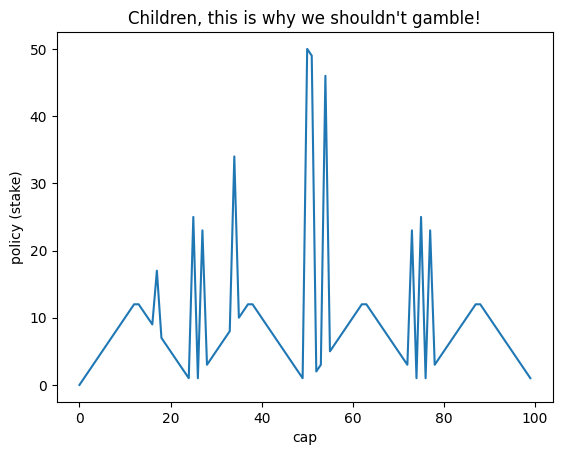

In [19]:
#for p_h 0.25
plt.figure()
plt.plot(np.arange(100),pi)
plt.xlabel('bet')
plt.ylabel('policy (stake)')
plt.title("Children, this is why we shouldn't gamble!")
plt.show()

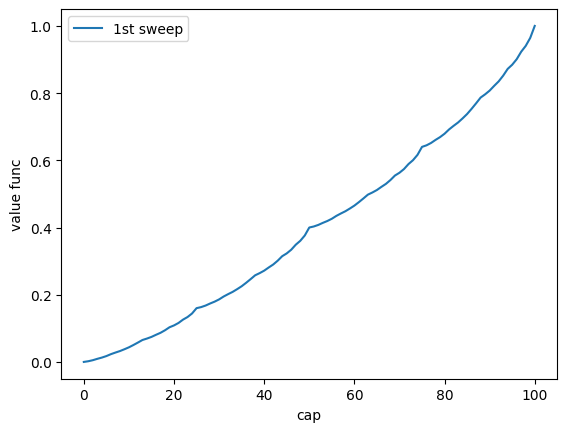

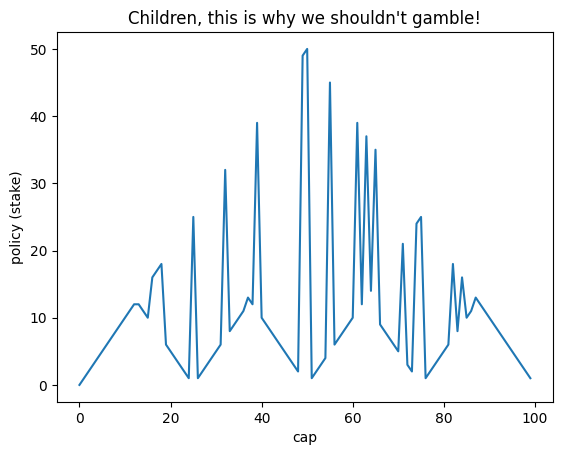

In [15]:
#0.40
plt.figure()
plt.plot(stakes)
plt.xlabel('bet')
plt.ylabel('value func')
plt.legend(['1st sweep', '2nd', '3rd', '4th', 'Final value function'])
plt.show()

plt.figure()
plt.plot(np.arange(100),pi)
plt.xlabel('bet')
plt.ylabel('policy (stake)')
plt.title("Children, this is why we shouldn't gamble!")
plt.show()


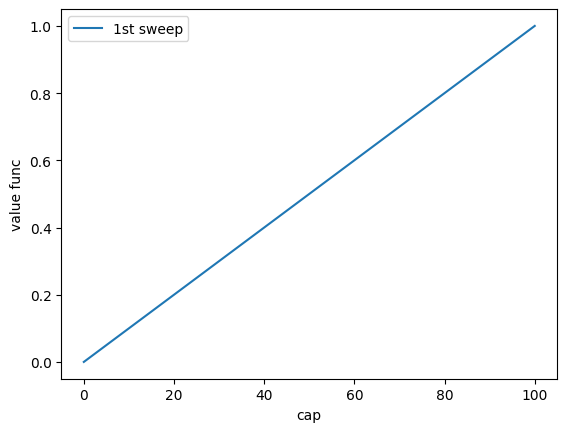

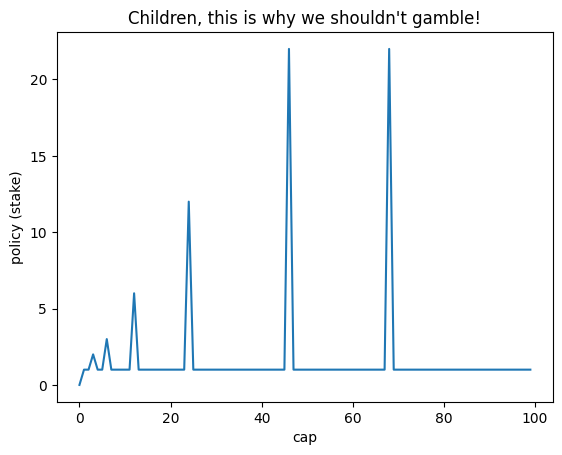

In [12]:
#0.50
plt.figure()
plt.plot(stakes)
plt.xlabel('bet')
plt.ylabel('value func')
plt.legend(['1st sweep', '2nd', '3rd', '4th', 'Final value function'])
plt.show()

plt.figure()
plt.plot(np.arange(100),pi)
plt.xlabel('bet')
plt.ylabel('policy (stake)')
plt.title("Children, this is why we shouldn't gamble!")
plt.show()


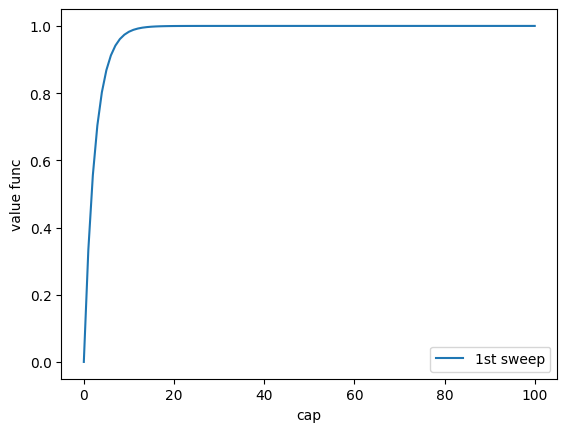

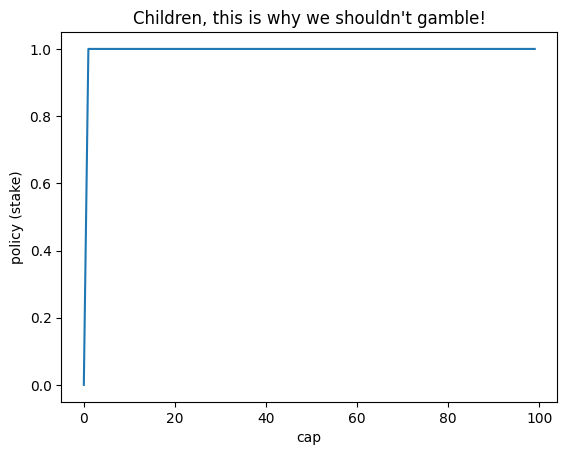

In [9]:
# 0.6 just want to see
plt.figure()
plt.plot(stakes)
plt.xlabel('bet')
plt.ylabel('value func')
plt.legend(['1st sweep', '2nd', '3rd', '4th', 'Final value function'])
plt.show()

plt.figure()
plt.plot(np.arange(100),pi)
plt.xlabel('bet')
plt.ylabel('policy (stake)')
plt.title("Children, this is why we shouldn't gamble!")
plt.show()
